In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib.pyplot as plt

# Load the dataset
#url = 'https://ml-course3-upgrad.s3.amazonaws.com/Unsupervised+Learning_+Clustering/Executing+K+Means+in+Python/Cricket.csv'
df = pd.read_csv("Cricket.csv", sep=",", encoding="ISO-8859-1", header=0)

# Inspect the data
print(df.head())




                        Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0         SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2         RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3      ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   

      BF     SR  100  50   0  
0  21367  86.23   49  96  20  
1  18048  78.86   25  93  15  
2  17046  80.39   30  82  20  
3  14725  91.20   28  68  34  
4  16020  78.96   19  77  28  


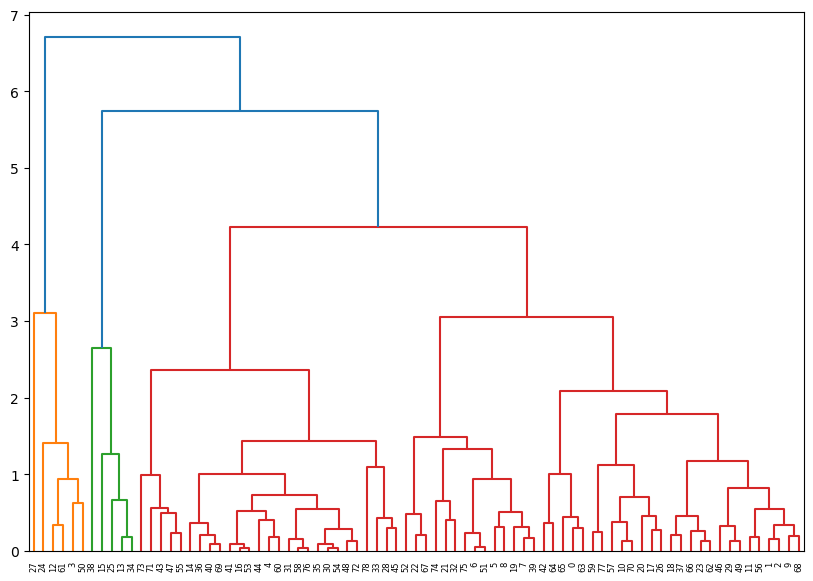

       SR    Ave  Cluster
0   86.23  44.83        4
1   78.86  41.98        4
2   80.39  42.03        4
3   91.20  32.36        1
4   78.96  33.37        3
..    ...    ...      ...
74  64.92  45.03        4
75  73.75  43.40        4
76  76.98  35.36        3
77  92.44  39.75        4
78  81.25  29.70        3

[79 rows x 3 columns]


/tmp/ipykernel_64814/3903327504.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = clusters


In [18]:


# Select relevant columns (Strike Rate and Average)
data = df[['SR', 'Ave']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform hierarchical clustering using complete linkage
linked = linkage(scaled_data, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=list(data.index), orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.show()

# Cut the tree to form 4 clusters
clusters = fcluster(linked, 4, criterion='maxclust')

# Add the cluster information to the dataset
data['Cluster'] = clusters

# Print the clusters to see which players are in which cluster
print(data)


In [6]:
df.describe

<bound method NDFrame.describe of                          Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0          SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1   KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2          RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3       ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4    DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   
..                          ...        ...  ...   ...  ..    ...   ...    ...   
74            CG Greenidge (WI)  1975-1991  128   127  13   5134  133*  45.03   
75          Misbah-ul-Haq (PAK)  2002-2015  162   149  31   5122   96*  43.40   
76         PD Collingwood (ENG)  2001-2011  197   181  37   5092  120*  35.36   
77              A Symonds (AUS)  1998-2009  198   161  33   5088   156  39.75   
78      Abdul Razzaq (Asia/PAK)  1996-2011  265   228  57   5080   112  29.

In [10]:
# Preprocessing: Select relevant features (assuming runs, centuries, etc., are the columns to use)
features = df[['Ave', 'SR']]  # Example columns, replace with the actual columns in your dataset

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Find the cluster of Virat Kohli
virat_cluster = df[df['Player'] == 'V Kohli (INDIA)']['Cluster'].values[0]

# Find all players in the same cluster as Virat Kohli
same_cluster_players = df[df['Cluster'] == virat_cluster]['Player']

print("Players in the same cluster as Virat Kohli:")
print(same_cluster_players)

Players in the same cluster as Virat Kohli:
0        SR Tendulkar (INDIA)
13      MS Dhoni (Asia/INDIA)
15    AB de Villiers (Afr/SA)
25            V Kohli (INDIA)
34               HM Amla (SA)
38             MG Bevan (AUS)
42          IVA Richards (WI)
46           LRPL Taylor (NZ)
63            MJ Guptill (NZ)
64           MEK Hussey (AUS)
65          RG Sharma (INDIA)
Name: Player, dtype: object
